In [1]:
import yfinance as yf
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
# Pull S&P Index historical values from yfinance API
ticker = "^GSPC" 
start= "1990-01-01" 
end= "2022-10-01"

sp_history = yf.download(ticker, start=start, end=end, progress=False)
sp_history = sp_history.asfreq(freq='D').ffill().dropna()
sp_history.to_csv('resources/sp_history.csv')
sp_history.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-09-26,3682.719971,3715.669922,3644.760010,3655.040039,3655.040039,4.886140e+09
2022-09-27,3686.439941,3717.530029,3623.290039,3647.290039,3647.290039,4.577740e+09
2022-09-28,3651.939941,3736.739990,3640.610107,3719.040039,3719.040039,4.684850e+09
2022-09-29,3687.010010,3687.010010,3610.399902,3640.469971,3640.469971,4.681810e+09
2022-09-30,3633.479980,3671.439941,3584.129883,3585.620117,3585.620117,5.645360e+09


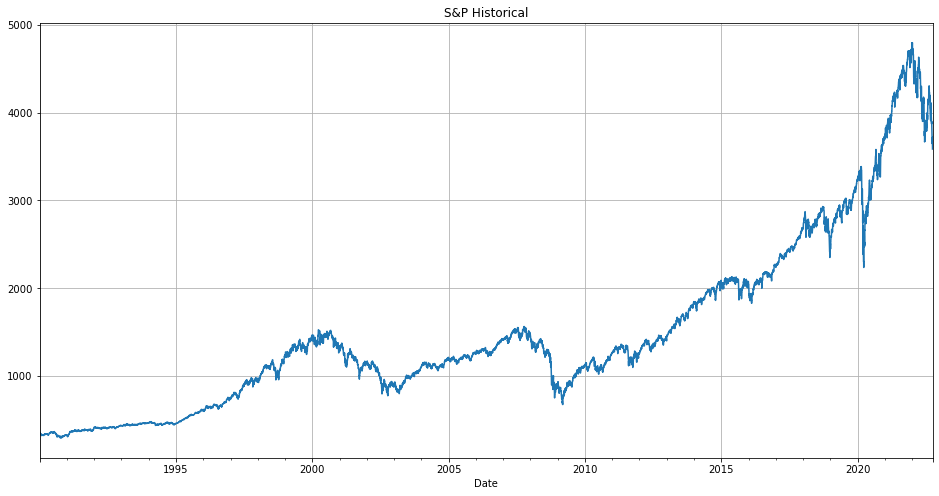

In [5]:
#Plot S&P Index historical data
sp_plot = sp_history['Adj Close'].plot(figsize=(16,8), title='S&P Historical', grid=True)

In [6]:
#Calculate S&P 500 percent change and 200-day rolling average
sp_percent_change = sp_history['Adj Close'].pct_change()
sp_percent_change_rolling = sp_percent_change.rolling(window=200).mean()

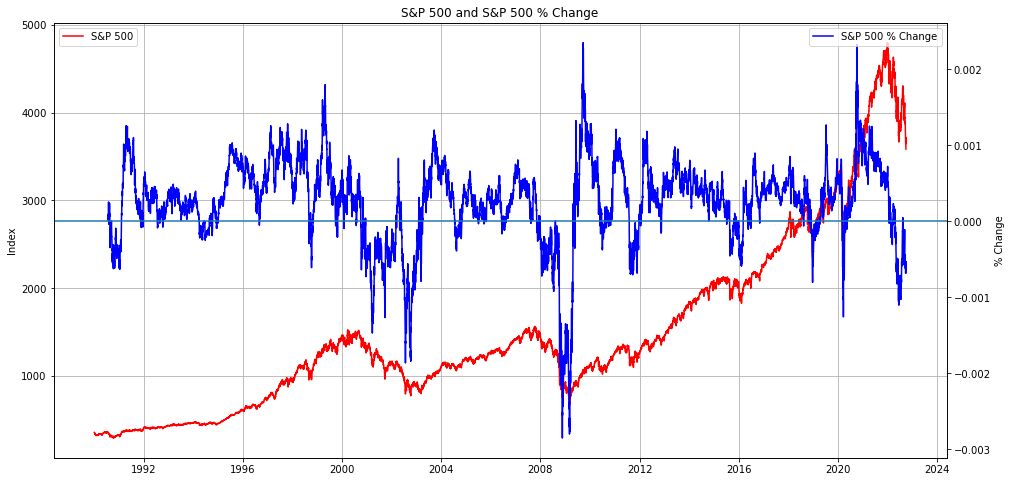

In [7]:
#Plot S&P 500 percent change 200-day rolling average vs S&P 500 index to identify % change below y value of 0 
fig, ax = plt.subplots(figsize=(16,8))
plt.plot(sp_history['Adj Close'], label ='S&P 500', color='r')
ax.set_ylabel('Index')
plt.grid()
ax.legend(loc='upper left')

ax2 = ax.twinx()
plt.plot(sp_percent_change_rolling, label='S&P 500 % Change', color='b')
ax.set_title('S&P 500 and S&P 500 % Change')
ax2.set_ylabel('% Change')
ax2.axhline(y=0)
ax2.legend(loc='upper right')